### Research, Development and Innovation, in Portuguese: Pesquisa, Desenvolvimento e Inovação (PD&I) 

**In this notebook, data are filtered by sub-themes related to Geophysics: a) UNCONVENTIONAL RESERVOIRS, b) EXPLORATORY RISK ANALYSIS, c) CHARACTERIZATION AND ENGINEERING OF RESERVOIRS, d) DEVELOPMENT OF NEW ALGORITHMS, e) GEOLOGICAL STUDIES OF SEDIMENTARY BASINS, f) RESERVOIR ENGINEERING (FLOW SIMULATION), g) RESERVOIR GEOPHYSICS, h) RESERVOIR GEOLOGY, h) GEOMECHANICS/WELL STABILIZATION, i) PETROPHYSICS, WELL LOGGING AND FORMATION EVALUATION, j) RESERVES, k) TECHNIQUES FOR ACQUISITION, PROCESSING AND INTERPRETATION OF GEOPHYSICAL DATA, and l) TECHNIQUES FOR ACQUISITION, PROCESSING AND INTERPRETATION OF RESERVOIR SCALE GEOPHYSICAL DATA.**

This notebook analyzes research, development and innovation data in the oil industry sponsored by companies in Brazil. Projects can be carried out by universities, research institutes or private companies.

"Law 9478, of 08/06/1997, established for the National Agency of Petroleum, Natural Gas and Biofuels (ANP), among others, the attribution of stimulating research and the adoption of new technologies for the sector. In view of this, the contracts entered into between the Agency and the Oil Companies for the exploration, development and production of oil and natural gas have, since Round Zero, Research, Development and Innovation clauses (RD&I Clause - PD&I in Portuguese) that establish the obligation to carry out of expenses qualified as RD&I by the Oil Companies.

The RD&I clause establishes the application of a percentage of the gross revenue from production, according to the specific conditions of each type of contract. The ANP is responsible for analyzing, approving, monitoring and supervising the application of resources arising from the RD&I clause."

The dataset was downloaded in August 27, 2022 from https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/dados-abertos-pesquisa-e-desenvolvimento-e-inovacao-pd-i

There may be errors and any feedback is appreciated.

#### Some projects are carried out by universities, service companies and oil companies. In these cases it is not possible to know how the work or income was shared.

#### Some companies share the concession of some fields. In these cases it is not possible to know how the investment was shared.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
pd.options.mode.chained_assignment = None

Data loading needs to take into account decimal and special characters.

In [2]:
input_data=pd.read_csv('projetos-rt-3-2015.csv',sep=';', encoding='latin1',decimal=',', parse_dates=['DAT_INICIO'], dayfirst=True)

In [3]:
input_data.dtypes

NUM_PROJETO_ANP            object
TITULO                     object
PROPONENTE                 object
QUALIFICACAO               object
OBJETIVO                   object
AREA                       object
TEMA                       object
SUB_TEMA                   object
EXECUTORES_UPS             object
EXECUTORES_EMP             object
NUM_AUTORIZACAO            object
PRAZO                       int64
DAT_INICIO         datetime64[ns]
VAL_CLAUSULA              float64
dtype: object

## The dataset

In [4]:
input_data.sort_values(by='DAT_INICIO', inplace=True)
input_data.reset_index(drop=True, inplace=True)
input_data

,NUM_PROJETO_ANP,TITULO,PROPONENTE,QUALIFICACAO,OBJETIVO,AREA,TEMA,SUB_TEMA,EXECUTORES_UPS,EXECUTORES_EMP,NUM_AUTORIZACAO,PRAZO,DAT_INICIO,VAL_CLAUSULA
0,20005-5,TAILS - Desenvolvimento de Sistema de Estabili...,REPSOL SINOPEC,PROTÓTIPO OU UNIDADE PILOTO,O objetivo é desenvolver um protótipo de um si...,TEMAS TRANSVERSAIS,SEGURANÇA E MEIO AMBIENTE,MONITORAMENTO E CONTROLE DE INSTALAÇÕES ONSHOR...,UFRJ - GSCAR - Grupo de Simulação e Controle e...,13ROBOTICS ROBOTICA LTDA - ME || REPSOL SINOPEC,NaN,29,2016-03-01,7302875.36
1,20006-3,RSB SPEED Fase 3: Modelo computacional destina...,REPSOL SINOPEC,PESQUISA APLICADA,Desenvolver e testar o protótipo de um modelo ...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"EXPLORAÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDA...","TÉCNICAS DE AQUISIÇÃO, PROCESSAMENTO E INTERPR...",SENAI-BA - SENAI CIMATEC,GEO IMAGING SOLUCOES TECNOLOGICAS EM GEOCIENCI...,NaN,22,2016-03-15,5553796.23
2,20004-8,DESENVOLVIMENTO DE UM SIMULADOR PARA ESCOAMENT...,PETROGAL BRASIL,PESQUISA APLICADA,"Pretende-se desenvolver um novo simulador, den...",EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,ENGENHARIA DE POÇO,ELEVAÇÃO ARTIFICIAL E ESCOAMENTO MULTIFÁSICO,NaN,ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE...,NaN,42,2016-05-15,12115023.33
3,20002-2,CYCLOP WP1/3 INFRAESTRUTURA - IMPLANTAÇÃO DE I...,REPSOL SINOPEC,INFRAESTRUTURA - REFORMA E EQUIPAMENTOS,Melhoria da infraestrutura laboratorial para p...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"EXPLORAÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDA...",ACUMULAÇÕES NÃO CONVENCIONAIS (UNCONVENCIONAL ...,UFRJ - LABTECH - Laboratório de Tecnologia do ...,NaN,0336/2016,18,2016-07-01,1468498.99
4,20008-9,Soluções Submarinas Enxutas para Águas Rasas,EQUINOR BRASIL,PESQUISA APLICADA,O mercado de águas profundas (DW) está cada ve...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"PRODUÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDAS,...",TÉCNICAS E EQUIPAMENTOS SUBMARINOS DE BOMBEAMENTO,NaN,EQUINOR BRASIL,NaN,10,2016-08-15,118221.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,22676-1,Desenvolvimento de Sistema robótico especialis...,SHELL BRASIL,PROTÓTIPO OU UNIDADE PILOTO,"O objetivo deste projeto é, a partir dos resul...",TEMAS TRANSVERSAIS,"AVALIAÇÃO DA CONFORMIDADE, MONITORAMENTO E CON...","AUTOMAÇÃO, CONTROLE, INSTRUMENTAÇÃO E METROLOGIA",SENAI-BA - SENAI CIMATEC || SENAI-SC - Institu...,MARINE PRODUCTION SYSTEMS DO BRASIL LTDA || SH...,NaN,30,2022-03-15,59382718.54
2588,22756-1,EV-01775 SITUA-PROSIM - Módulo de Intervenção ...,PETROBRAS,PESQUISA APLICADA,O Objetivo deste projeto é desenvolver Ferrame...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"PRODUÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDAS,...","UNIDADES FLUTUANTES DE PRODUÇÃO, SISTEMAS DE A...",NaN,PETROBRAS,NaN,12,2022-03-16,64090.00
2589,22732-2,Corrosão em alta temperatura de cortes de petr...,PETROBRAS,PESQUISA BÁSICA,Realizar ensaios em autoclave a partir de cort...,ABASTECIMENTO,REFINO,"OTIMIZAÇÃO E CONFIABILIDADE DE EQUIPAMENTOS, P...",NaN,PETROBRAS,NaN,21,2022-03-16,732500.09
2590,22688-6,Petrologia de Rochas Lamíticas,PETROBRAS,PESQUISA APLICADA,O objetivo principal é a aplicação das facilid...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"EXPLORAÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDA...",ESTUDOS GEOLÓGICOS DAS BACIAS SEDIMENTARES,UFRGS - Instituto de Geociências UFRGS,NaN,NaN,24,2022-03-18,1374631.74


#### First and last project started in the dataset

In [5]:
input_data.PROPONENTE.iloc[0],input_data.DAT_INICIO.iloc[0]

('REPSOL SINOPEC', Timestamp('2016-03-01 00:00:00'))

In [6]:
input_data.PROPONENTE.iloc[-1],input_data.DAT_INICIO.iloc[-1]

('SHELL BRASIL', Timestamp('2022-03-25 00:00:00'))

### Sub-themes

In [7]:
input_data.SUB_TEMA.unique()

array(['MONITORAMENTO E CONTROLE DE INSTALAÇÕES ONSHORE E OFFSHORE',
       'TÉCNICAS DE AQUISIÇÃO, PROCESSAMENTO E INTERPRETAÇÃO DE DADOS GEOFÍSICOS',
       'ELEVAÇÃO ARTIFICIAL E ESCOAMENTO MULTIFÁSICO',
       'ACUMULAÇÕES NÃO CONVENCIONAIS (UNCONVENCIONAL RESERVOIRS)',
       'TÉCNICAS E EQUIPAMENTOS SUBMARINOS DE BOMBEAMENTO',
       'TECNOLOGIA DE MATERIAIS',
       'PETROFÍSICA, PERFILAGEM DE POÇOS E AVALIAÇÃO DE FORMAÇÕES',
       'GEOFÍSICA DE RESERVATÓRIO',
       'RISERS, UMBILICAIS E DUTOS SUBMARINOS',
       'RECUPERAÇÃO MELHORADA DE PETRÓLEO',
       'LUBRIFICANTES E BIOLUBRIFICANTES',
       'PERFURAÇÃO E COMPLETAÇÃO - TÉCNICAS E TECNOLOGIAS',
       'MONITORAMENTO DE ÁREAS IMPACTADAS POR ATIVIDADES DA INDÚSTRIA DE PETRÓLEO, GÁS NATURAL E BIOCOMBUSTÍVEIS',
       'INTEGRIDADE ESTRUTURAL, SOLDAGEM E CARACTERIZAÇÃO DE MATERIAIS',
       'NOVOS MATERIAIS', 'CORROSÃO E PROTEÇÃO', 'SISTEMAS CATALÍTICOS',
       'DESENVOLVIMENTO DE EQUIPAMENTOS',
       'OTIMIZAÇÃO E CONFIABI

In [8]:
geophysics_stheme=['ACUMULAÇÕES NÃO CONVENCIONAIS (UNCONVENCIONAL RESERVOIRS)','ANÁLISE DE RISCO EXPLORATÓRIO','CARACTERIZAÇÃO E ENGENHARIA DE RESERVATÓRIOS',\
                    'DESENVOLVIMENTO DE NOVOS ALGORITMOS','ESTUDOS GEOLÓGICOS DAS BACIAS SEDIMENTARES','ENGENHARIA DE RESERVATÓRIO (SIMULAÇÃO DE FLUXO)',\
                   'GEOFÍSICA DE RESERVATÓRIO','GEOLOGIA DE RESERVATÓRIO','GEOMECÂNICA/ESTABILIZAÇÃO DE POÇOS','PETROFÍSICA, PERFILAGEM DE POÇOS E AVALIAÇÃO DE FORMAÇÕES',\
                   'RESERVAS','TÉCNICAS DE AQUISIÇÃO, PROCESSAMENTO E INTERPRETAÇÃO DE DADOS GEOFÍSICOS',\
                   'TÉCNICAS DE AQUISIÇÃO, PROCESSAMENTO E INTERPRETAÇÃO DE DADOS GEOFÍSICOS EM ESCALA DE RESERVATÓRIO']

In [9]:
geophysics_stheme

['ACUMULAÇÕES NÃO CONVENCIONAIS (UNCONVENCIONAL RESERVOIRS)',
 'ANÁLISE DE RISCO EXPLORATÓRIO',
 'CARACTERIZAÇÃO E ENGENHARIA DE RESERVATÓRIOS',
 'DESENVOLVIMENTO DE NOVOS ALGORITMOS',
 'ESTUDOS GEOLÓGICOS DAS BACIAS SEDIMENTARES',
 'ENGENHARIA DE RESERVATÓRIO (SIMULAÇÃO DE FLUXO)',
 'GEOFÍSICA DE RESERVATÓRIO',
 'GEOLOGIA DE RESERVATÓRIO',
 'GEOMECÂNICA/ESTABILIZAÇÃO DE POÇOS',
 'PETROFÍSICA, PERFILAGEM DE POÇOS E AVALIAÇÃO DE FORMAÇÕES',
 'RESERVAS',
 'TÉCNICAS DE AQUISIÇÃO, PROCESSAMENTO E INTERPRETAÇÃO DE DADOS GEOFÍSICOS',
 'TÉCNICAS DE AQUISIÇÃO, PROCESSAMENTO E INTERPRETAÇÃO DE DADOS GEOFÍSICOS EM ESCALA DE RESERVATÓRIO']

In [10]:
data =input_data[input_data['SUB_TEMA'].isin(geophysics_stheme)]
data

,NUM_PROJETO_ANP,TITULO,PROPONENTE,QUALIFICACAO,OBJETIVO,AREA,TEMA,SUB_TEMA,EXECUTORES_UPS,EXECUTORES_EMP,NUM_AUTORIZACAO,PRAZO,DAT_INICIO,VAL_CLAUSULA
1,20006-3,RSB SPEED Fase 3: Modelo computacional destina...,REPSOL SINOPEC,PESQUISA APLICADA,Desenvolver e testar o protótipo de um modelo ...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"EXPLORAÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDA...","TÉCNICAS DE AQUISIÇÃO, PROCESSAMENTO E INTERPR...",SENAI-BA - SENAI CIMATEC,GEO IMAGING SOLUCOES TECNOLOGICAS EM GEOCIENCI...,NaN,22,2016-03-15,5553796.23
3,20002-2,CYCLOP WP1/3 INFRAESTRUTURA - IMPLANTAÇÃO DE I...,REPSOL SINOPEC,INFRAESTRUTURA - REFORMA E EQUIPAMENTOS,Melhoria da infraestrutura laboratorial para p...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"EXPLORAÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDA...",ACUMULAÇÕES NÃO CONVENCIONAIS (UNCONVENCIONAL ...,UFRJ - LABTECH - Laboratório de Tecnologia do ...,NaN,0336/2016,18,2016-07-01,1468498.99
6,20013-9,INVERSÃO ESTOCÁSTICA MODIFICADA,PETROGAL BRASIL,PESQUISA APLICADA,As duas empresas pretendem desenvolver um proj...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"EXPLORAÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDA...","TÉCNICAS DE AQUISIÇÃO, PROCESSAMENTO E INTERPR...",NaN,PARADIGM GEOPHYSICAL || PETROGAL BRASIL,NaN,24,2016-09-21,6854072.07
7,20015-4,Caracterização petrofísica multi-escala de res...,EQUINOR BRASIL,PESQUISA APLICADA,Caracterizar rochas reservatório do pré-sal us...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"EXPLORAÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDA...","PETROFÍSICA, PERFILAGEM DE POÇOS E AVALIAÇÃO D...",UNICAMP - Centro de Estudos de Petróleo - CEPETRO,EQUINOR BRASIL,NaN,26,2016-12-12,2909000.60
8,20023-8,Caracterização de Testemunhos e Plugues por An...,BG BRASIL,PESQUISA APLICADA,Esta proposta de pesquisa abordará a influênci...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"EXPLORAÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDA...","TÉCNICAS DE AQUISIÇÃO, PROCESSAMENTO E INTERPR...",NaN,BG BRASIL || INGRAIN BRASIL SERVIÇOS DE GEOFÍS...,NaN,11,2016-12-12,2826551.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,22741-3,I. A. para Aquisição Geológica,PETROBRAS,DESENVOLVIMENTO EXPERIMENTAL,Elaboração e implementação de algoritmos de In...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"EXPLORAÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDA...",DESENVOLVIMENTO DE NOVOS ALGORITMOS,NaN,PETROBRAS,NaN,25,2022-02-24,5585183.97
2583,22715-7,Screening e Validação de Dados Geoquímicos do ...,PETROBRAS,DESENVOLVIMENTO EXPERIMENTAL,O objetivo visa o saneamento dos resultados pr...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"EXPLORAÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDA...",DESENVOLVIMENTO DE NOVOS ALGORITMOS,NaN,PETROBRAS,NaN,24,2022-03-09,1077169.40
2584,22713-2,Avaliação do uso de Gliders para extração de s...,PETROBRAS,DESENVOLVIMENTO EXPERIMENTAL,Avaliar se a aquisição de dados por Gliders co...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"PRODUÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDAS,...","TÉCNICAS DE AQUISIÇÃO, PROCESSAMENTO E INTERPR...",NaN,PETROBRAS,NaN,25,2022-03-10,213638.40
2590,22688-6,Petrologia de Rochas Lamíticas,PETROBRAS,PESQUISA APLICADA,O objetivo principal é a aplicação das facilid...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"EXPLORAÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDA...",ESTUDOS GEOLÓGICOS DAS BACIAS SEDIMENTARES,UFRGS - Instituto de Geociências UFRGS,NaN,NaN,24,2022-03-18,1374631.74


## Projects per year

In [11]:
pd.options.display.float_format = '{:.2f}'.format
project_year=data.groupby(['DAT_INICIO']).size().reset_index(name='Projects').sort_values(by='DAT_INICIO',ascending=[False])
project_year=project_year.groupby(project_year.DAT_INICIO.dt.to_period("Y")).sum()
project_year.index.names = ['Year']
project_year.reset_index(inplace=True)
project_year

,Year,Projects
0,2016,5
1,2017,45
2,2018,114
3,2019,165
4,2020,57
5,2021,176
6,2022,22


#### Total amount of projects started between 2016-03-01 and 2022-03-25

In [12]:
project_year.Projects.sum()

584

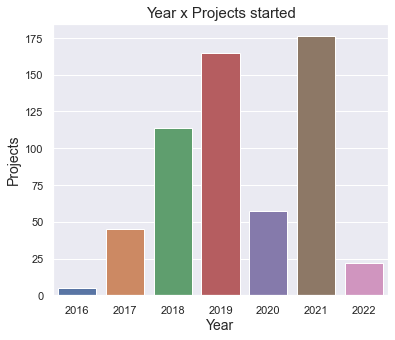

In [13]:
sns.set()
plt.figure(figsize = (6,5))

sns.barplot(x='Year', y='Projects', data=project_year, orient = 'v')

plt.title('Year x Projects started',fontsize=15)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Projects',fontsize=14)
plt.show()

## Investment per year

In [14]:
invest_year=data.groupby(data.DAT_INICIO.dt.to_period("Y")).sum()
invest_year.drop(['PRAZO'],axis=1,inplace=True)
invest_year=invest_year.rename(columns = {'VAL_CLAUSULA':'Investment (R$ Millions)'})
invest_year['Investment (R$ Millions)'] = invest_year['Investment (R$ Millions)']/1000000.
invest_year.index.names = ['Year']
invest_year.reset_index(inplace=True)
invest_year

,Year,Investment (R$ Millions)
0,2016,19.61
1,2017,227.78
2,2018,473.15
3,2019,756.67
4,2020,294.39
5,2021,273.38
6,2022,88.43


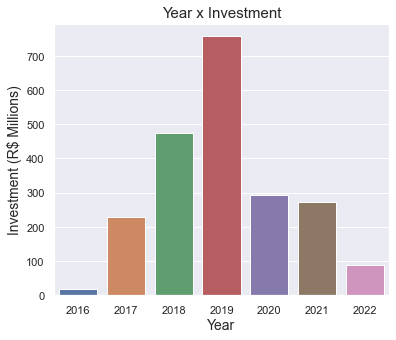

In [15]:
sns.set()
plt.figure(figsize = (6,5))

sns.barplot(x='Year', y='Investment (R$ Millions)', data=invest_year, orient = 'v')

plt.title('Year x Investment',fontsize=15)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Investment (R$ Millions)',fontsize=14)
plt.show()

## Sponsoring companies

**Important note:** Some companies share the concession of some fields and from the dataset it is not possible to address the percentage of the budget invested by each of them in this analysis. These cases are shown below where the names of the companies are separated by **| |**. Therefore, differences can be found when compared with the analysis performed by the National Oil Agency (ANP).

In [16]:
data.PROPONENTE.unique()

array(['REPSOL SINOPEC', 'PETROGAL BRASIL', 'EQUINOR BRASIL', 'BG BRASIL',
       'ENAUTA ENERGIA', 'PETROBRAS', 'SHELL BRASIL',
       'CNODC BRASIL || CNOOC PETROLEUM || PETROBRAS || SHELL BRASIL || TOTALENERGIES EP',
       'PARNAÍBA GÁS NATURAL', 'TOTALENERGIES EP', 'ENEVA',
       'GEOPARK BRASIL', 'EQUINOR BRASIL || EQUINOR ENERGY',
       'REPSOL SINOPEC || SHELL BRASIL', 'PETRONAS'], dtype=object)

#### Below, the dataframe is sorted in ascending order of sponsored projects. 

In [17]:
sponsor = []
pd.options.display.float_format = '{:.2f}'.format
sponsor=data.groupby(['PROPONENTE']).size().reset_index(name='Projects').sort_values(by='Projects',ascending=[False])
sponsor['Investment (R$)'] = (data.groupby(["PROPONENTE"]).VAL_CLAUSULA.sum().reset_index().sort_values(by='VAL_CLAUSULA',ascending=[False]).VAL_CLAUSULA).astype(float)
sponsor=sponsor.rename(columns = {'PROPONENTE':'Sponsor'})

In [18]:
sponsor

,Sponsor,Projects,Investment (R$)
8,PETROBRAS,481,1348083038.86
13,SHELL BRASIL,32,363793090.30
11,REPSOL SINOPEC,19,95376027.55
9,PETROGAL BRASIL,13,113553984.67
0,BG BRASIL,9,83564441.25
4,EQUINOR BRASIL,8,25412585.95
5,EQUINOR BRASIL || EQUINOR ENERGY,7,45897641.06
1,CNODC BRASIL || CNOOC PETROLEUM || PETROBRAS |...,6,31817366.38
2,ENAUTA ENERGIA,2,3380557.18
6,GEOPARK BRASIL,2,1651777.16


#### Merge Equinor, which appears twice in the dataframe 

In [19]:
sponsor.at[4,'Sponsor'] = 'EQUINOR'
sponsor.at[4,'Projects'] = sponsor.loc[4][1] + sponsor.loc[5][1] 
sponsor.at[4,'Investment (R$)'] = sponsor.loc[4][2] + sponsor.loc[5][2]
sponsor.drop(index=[5], inplace = True )

### Projects x Sponsoring companies

#### 14 companies sponsored Geophysics related projects. Petrobras sponsored more than 80% of the projects between March 2016 and March 2022.

In [20]:
#Add columns and reorder
sponsor['% of Projects'] = (sponsor.Projects / sum(sponsor.Projects.values)).round(decimals=2)*100
sponsor['Investment (R$ Millions)'] = sponsor['Investment (R$)']/1000000.

sponsor.sort_values(by='Projects',ascending=[False], inplace=True)
sponsor.index = np.arange(len(sponsor))

sponsor

,Sponsor,Projects,Investment (R$),% of Projects,Investment (R$ Millions)
0,PETROBRAS,481,1348083038.86,82.00,1348.08
1,SHELL BRASIL,32,363793090.30,5.00,363.79
2,REPSOL SINOPEC,19,95376027.55,3.00,95.38
3,EQUINOR,15,71310227.01,3.00,71.31
4,PETROGAL BRASIL,13,113553984.67,2.00,113.55
5,BG BRASIL,9,83564441.25,2.00,83.56
6,CNODC BRASIL || CNOOC PETROLEUM || PETROBRAS |...,6,31817366.38,1.00,31.82
7,ENAUTA ENERGIA,2,3380557.18,0.00,3.38
8,GEOPARK BRASIL,2,1651777.16,0.00,1.65
9,ENEVA,1,1356305.45,0.00,1.36


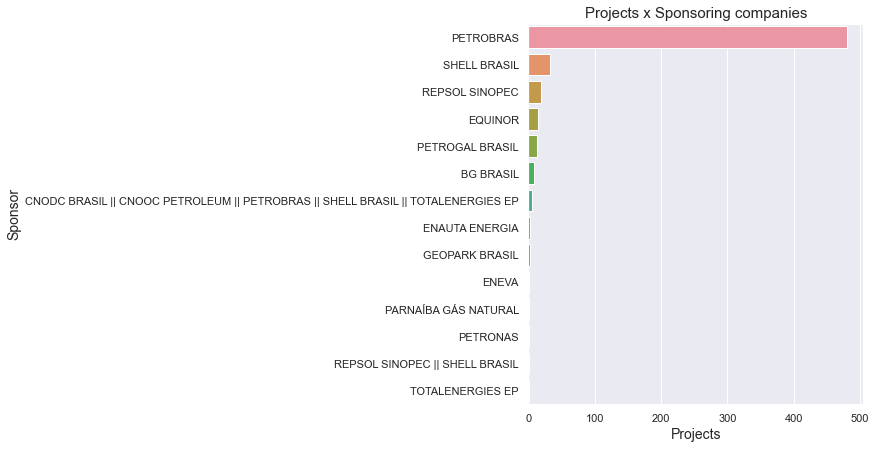

In [21]:
sns.set()
plt.figure(figsize = (6,7))

sns.barplot(x='Projects', y='Sponsor', data=sponsor, orient = 'h')

plt.title('Projects x Sponsoring companies',fontsize=15)
plt.xlabel('Projects',fontsize=14)
plt.ylabel('Sponsor',fontsize=14)
plt.show()

### Investiment x Sponsoring companies

In [22]:
sponsor.sort_values(by='Investment (R$ Millions)',ascending=[False], inplace=True)
sponsor.index = np.arange(len(sponsor))

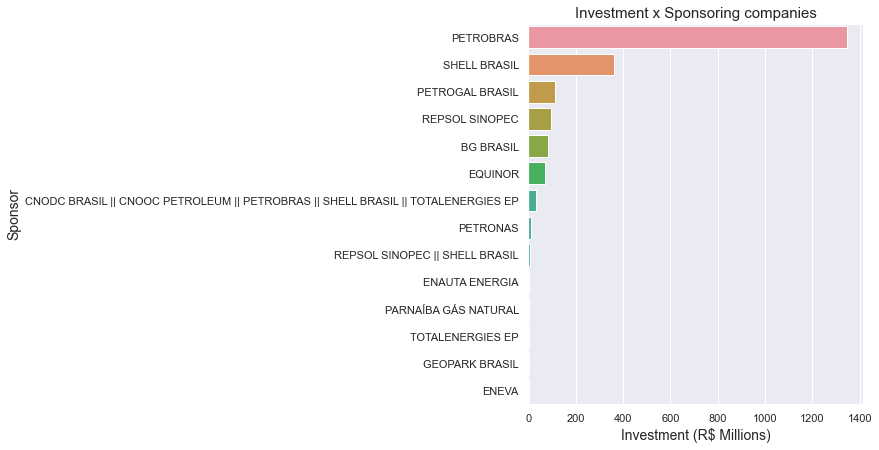

In [23]:
sns.set()
plt.figure(figsize = (6,7))

sns.barplot(x='Investment (R$ Millions)', y='Sponsor', data=sponsor, orient = 'h')

plt.title('Investment x Sponsoring companies',fontsize=15)
plt.xlabel('Investment (R$ Millions)',fontsize=14)
plt.ylabel('Sponsor',fontsize=14)
plt.show()

## Granted - Universities and research centers

In [24]:
data.EXECUTORES_UPS.unique()

array(['SENAI-BA - SENAI CIMATEC',
       'UFRJ - LABTECH - Laboratório de Tecnologia do Hidrogênio', nan,
       'UNICAMP - Centro de Estudos de Petróleo - CEPETRO',
       'UTFPR - NUFER - Núcleo de Manufatura Aditiva e Ferramental',
       'UTFPR - CERNN - Centro de Pesquisas em Fluidos Não Newtonianos || UTFPR - NUFER - Núcleo de Manufatura Aditiva e Ferramental',
       'UNESP - Núcleo de Cronologia e Cronometria - IGCE - DG - UNESP',
       'UFRN || UFRN - DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL',
       'UFRJ - Laboratório de Geologia Sedimentar - Lagesed',
       'USP - CENTRO DE PESQUISA PARA INOVAÇÃO EM GÁS (RCGI)',
       'PUC-Rio - Grupo de GeoAnálise',
       'UFRJ - Laboratório de Métodos Computacionais em Engenharia',
       'UFPR - Laboratório de Análise de Minerais e Rochas-LAMIR',
       'UFAL - Laboratório de Computação Científica e Visualização - LCCV/UFAL',
       'UFRN - SISTEMAS PETROLÍFEROS', 'UNISINOS - ITT FOSSIL',
       'PUC-Rio - Instituto TECGRAF de 

#### Universities - abbreviation

In [25]:
Universities = data['EXECUTORES_UPS'].str.split(' - ').str[0]
Universities= Universities.str.split('     ').str[0]
Universities.unique()

array(['SENAI-BA', 'UFRJ', nan, 'UNICAMP', 'UTFPR', 'UNESP',
       'UFRN || UFRN', 'USP', 'PUC-Rio', 'UFPR', 'UFAL', 'UFRN',
       'UNISINOS', 'UFG', 'UFSC', 'UFC', 'UFPE', 'ON', 'UFMG',
       'UENF || UFBA', 'CBPF', 'UFBA', 'UFRGS', 'LNCC', 'LACTEC', 'UFPB',
       'UENF', 'UFF', 'SENAI-PE', 'UFPA', 'UERJ', 'UFES', 'UFCG', 'CHM',
       'UFMT', 'UFRRJ', 'PUC-RS', 'ITP', 'UnB', 'UFPI', 'UDESC', 'CPRM',
       'ITA', 'UFOP', 'CNPEM', 'SENAI-RS'], dtype=object)

In [26]:
universities = []
universities2 = []
universities = data
pd.options.display.float_format = '{:.2f}'.format
universities['Universities'] = Universities
universities2=universities.groupby(['Universities']).size().reset_index(name='Projects').sort_values(by='Projects',ascending=[False])
universities2['Grant (R$)'] = (universities.groupby(["Universities"]).VAL_CLAUSULA.sum().reset_index().sort_values(by='VAL_CLAUSULA',ascending=[False]).VAL_CLAUSULA).astype(float)
universities2['Grant (R$ Millions)'] = universities2['Grant (R$)']/1000000.
universities2.drop(['Grant (R$)'], axis=1, inplace=True)

universities2

,Universities,Projects,Grant (R$ Millions)
10,PUC-Rio,36,194.24
34,UFRJ,31,201.28
40,UNICAMP,28,147.45
33,UFRGS,20,65.82
23,UFF,14,115.79
38,UFSC,12,31.28
41,UNISINOS,11,80.35
30,UFPE,10,39.41
35,UFRN,10,41.36
44,UnB,9,34.40


#### Merge 'UFRN' with 'UFRN || UFRN' 

In [27]:
print(universities2[universities2['Universities'].str.contains('UFRN', regex=False)])

    Universities  Projects  Grant (R$ Millions)
35          UFRN        10                41.36
36  UFRN || UFRN         2                31.02


In [28]:
universities2.loc[35,'Projects']+=universities2.loc[36,'Projects']
universities2.loc[35,'Grant (R$ Millions)']+=universities2.loc[36,'Grant (R$ Millions)']
universities2.drop(index=[36],inplace=True)

#### 44 universities or research centers developed research

In [29]:
universities2.sort_values(by='Projects',ascending=[False], inplace=True)
universities2.reset_index(drop=True, inplace=True)
universities2

,Universities,Projects,Grant (R$ Millions)
0,PUC-Rio,36,194.24
1,UFRJ,31,201.28
2,UNICAMP,28,147.45
3,UFRGS,20,65.82
4,UFF,14,115.79
5,UFSC,12,31.28
6,UFRN,12,72.39
7,UNISINOS,11,80.35
8,UFPE,10,39.41
9,USP,9,44.96


#### Top 20 universities sorted by Projects

In [30]:
universities2_20=[]
universities2_20=universities2[:19]
universities2_20.loc[len(universities2_20.index)] = ['OTHERS', sum(universities2['Projects'][19:]), 0]

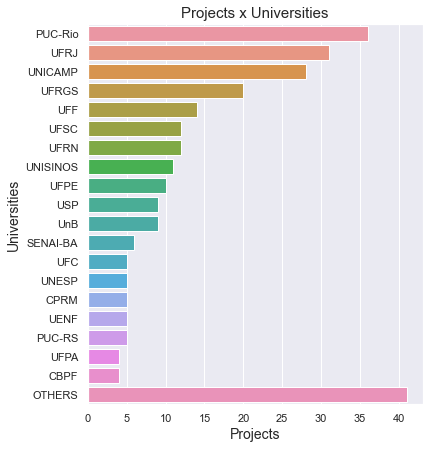

In [31]:
sns.set()
plt.figure(figsize = (6,7))

sns.barplot(x='Projects', y='Universities', data=universities2_20, orient = 'h')

plt.title('Projects x Universities',fontsize=15)
plt.xlabel('Projects',fontsize=14)
plt.ylabel('Universities',fontsize=14)
plt.show()

#### Top 20 universities sorted by Grant

In [32]:
university_grant=universities2.sort_values(by='Grant (R$ Millions)',ascending=[False])
university_grant.reset_index(drop=True, inplace=True)
university_grant

,Universities,Projects,Grant (R$ Millions)
0,UFRJ,31,201.28
1,PUC-Rio,36,194.24
2,UNICAMP,28,147.45
3,UFF,14,115.79
4,UNISINOS,11,80.35
5,UFRN,12,72.39
6,UFRGS,20,65.82
7,SENAI-BA,6,55.48
8,USP,9,44.96
9,UENF,5,44.75


In [33]:
university_grant_20=[]
university_grant_20=university_grant[:19]
university_grant_20.loc[len(university_grant_20.index)] = ['OTHERS', 0, sum(university_grant['Grant (R$ Millions)'][19:])]
university_grant_20

,Universities,Projects,Grant (R$ Millions)
0,UFRJ,31,201.28
1,PUC-Rio,36,194.24
2,UNICAMP,28,147.45
3,UFF,14,115.79
4,UNISINOS,11,80.35
5,UFRN,12,72.39
6,UFRGS,20,65.82
7,SENAI-BA,6,55.48
8,USP,9,44.96
9,UENF,5,44.75


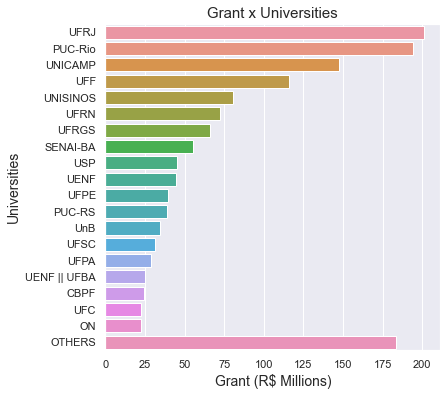

In [34]:
sns.set()
plt.figure(figsize = (6,6))

sns.barplot(x='Grant (R$ Millions)', y='Universities', data=university_grant_20, orient = 'h')

plt.title('Grant x Universities',fontsize=15)
plt.xlabel('Grant (R$ Millions)',fontsize=14)
plt.ylabel('Universities',fontsize=14)
plt.show()

## Granted - Companies

Some companies appear as Sponsor and Executors of projects. Additionally, some companies appear with Universities in the same project. Therefore, is not possible to determine row the work and revenue were shared. A new dataframe is created without Sponsoring companies as executors.

In [35]:
data.EXECUTORES_EMP.unique()

array(['GEO IMAGING SOLUCOES TECNOLOGICAS EM GEOCIENCIAS LTDA. || REPSOL SINOPEC',
       nan, 'PARADIGM GEOPHYSICAL || PETROGAL BRASIL', 'EQUINOR BRASIL',
       'BG BRASIL || INGRAIN BRASIL SERVIÇOS DE GEOFÍSICA LTDA',
       'BG BRASIL || SCHLUMBERGER SERVICOS DE PETROLEO LTDA                      ',
       'INVISION',
       'DEEP SEED SOLUTIONS DESENVOLVIMENTO DE PROGRAMAS DE COMPUTADOR LTDA - EPP || REPSOL SINOPEC',
       'REPSOL SINOPEC', 'INVISION || REPSOL SINOPEC', 'BG BRASIL',
       'BG BRASIL || WOOD GROUP KENNY DO BRASIL SERVIÇOS DE ENGENHARIA LTDA.',
       'PETROBRAS', 'SHELL BRASIL',
       'ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE LTDA || SHELL BRASIL',
       'PIX FORCE TECNOLOGIA LTDA', 'HALLIBURTON',
       'GEOESPAÇO SENSORIAMENTO REMOTO E GEOLOGIA DO PETRÓLEO LTDA.',
       'PARNAÍBA GÁS NATURAL', 'HALLIBURTON || SHELL BRASIL',
       'QIGEO ASSESSORIA E CONSULTORIA LTDA || REPSOL SINOPEC',
       'PETREC || REPSOL SINOPEC', 'OPTIMATECH LTDA || REPSOL SINO

In [36]:
companies = []
pd.options.display.float_format = '{:.2f}'.format
companies=data.groupby(['EXECUTORES_EMP']).size().reset_index(name='VAL_CLAUSULA').sort_values(by='VAL_CLAUSULA',ascending=[False])
companies['Revenue (R$)'] = (data.groupby(["EXECUTORES_EMP"]).VAL_CLAUSULA.sum().reset_index().sort_values(by='VAL_CLAUSULA',ascending=[False]).VAL_CLAUSULA).astype(float)
companies=companies.rename(columns = {'EXECUTORES_EMP':'Company','VAL_CLAUSULA':'Projects'})
companies['Revenue (R$ Millions)'] = companies['Revenue (R$)']/1000000.
companies.drop(['Revenue (R$)'],axis=1,inplace=True)
companies.sort_values(by='Revenue (R$ Millions)',ascending=[False],inplace=True)

#### Companies sorted by Revenue

In [37]:
companies

,Company,Projects,Revenue (R$ Millions)
31,PETROBRAS,279,479.10
40,SHELL BRASIL,18,212.51
1,BG BRASIL,4,58.22
32,PETROGAL BRASIL,3,38.64
10,EQUINOR BRASIL || EQUINOR ENERGY,5,36.82
17,HALLIBURTON || SHELL BRASIL,1,36.57
18,IBM BRASIL || PETROGAL BRASIL,1,22.73
3,BG BRASIL || SCHLUMBERGER SERVICOS DE PETROLEO...,1,18.10
27,PARADIGM GEOPHYSICAL || PETROGAL BRASIL,2,14.52
0,AVEVA DO BRASIL INFORMATICA LTDA || SHELL BRASIL,1,13.80


#### Cleaning the dataframe 

In [38]:
# Merge Equinor, which appears twice in the dataframe 
companies.at[9,'Company'] = 'EQUINOR'
companies.at[9,'Projects'] += companies.loc[10][1] 
companies.at[9,'Revenue (R$ Millions)'] += companies.loc[10][2]
companies.drop(index=[10], inplace = True )

In [39]:
print(companies[companies['Company'].str.contains('HALLIBURTON', regex=False)])

                        Company  Projects  Revenue (R$ Millions)
17  HALLIBURTON || SHELL BRASIL         1                  36.57
16                  HALLIBURTON         1                   2.90


In [40]:
companies.loc[16,'Projects']+=companies.loc[17,'Projects']
companies.loc[16,'Revenue (R$ Millions)']+=companies.loc[17,'Revenue (R$ Millions)']
companies.drop(index=[17],inplace=True)

In [41]:
print(companies[companies['Company'].str.contains('SCHLUMBERGER', regex=False)])

                                              Company  Projects  \
3   BG BRASIL || SCHLUMBERGER SERVICOS DE PETROLEO...         1   
39                       SCHLUMBERGER || SHELL BRASIL         1   
11   EQUINOR BRASIL || EQUINOR ENERGY || SCHLUMBERGER         1   
38                                       SCHLUMBERGER         2   

    Revenue (R$ Millions)  
3                   18.10  
39                  11.50  
11                   5.60  
38                   4.67  


In [42]:
companies.loc[38,'Projects']+=companies.loc[3,'Projects']+companies.loc[39,'Projects']+companies.loc[11,'Projects']
companies.loc[38,'Revenue (R$ Millions)']+=companies.loc[3,'Revenue (R$ Millions)']+companies.loc[39,'Revenue (R$ Millions)']+companies.loc[11,'Revenue (R$ Millions)']
companies.drop(index=[3,39,11],inplace=True)

In [43]:
print(companies[companies['Company'].str.contains('ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE LTDA', regex=False)])

                                             Company  Projects  \
7  ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE...         2   
8  ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE...         1   

   Revenue (R$ Millions)  
7                   9.32  
8                   8.22  


In [44]:
companies.loc[7,'Projects']+=companies.loc[8,'Projects']
companies.loc[7,'Revenue (R$ Millions)']+=companies.loc[8,'Revenue (R$ Millions)']
companies.loc[7,'Company'] = 'ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE'
companies.drop(index=[8],inplace=True)

In [45]:
print(companies[companies['Company'].str.contains('IBM', regex=False)])

                          Company  Projects  Revenue (R$ Millions)
18  IBM BRASIL || PETROGAL BRASIL         1                  22.73


In [46]:
companies.loc[18,'Company'] = 'IBM'

In [47]:
print(companies[companies['Company'].str.contains('PARADIGM', regex=False)])

                                    Company  Projects  Revenue (R$ Millions)
27  PARADIGM GEOPHYSICAL || PETROGAL BRASIL         2                  14.52


In [48]:
companies.loc[27,'Company'] = 'PARADIGM GEOPHYSICAL'

In [49]:
print(companies[companies['Company'].str.contains('AVEVA', regex=False)]) 

                                            Company  Projects  \
0  AVEVA DO BRASIL INFORMATICA LTDA || SHELL BRASIL         1   

   Revenue (R$ Millions)  
0                  13.80  


In [50]:
companies.loc[0,'Company'] = 'AVEVA DO BRASIL'

In [51]:
print(companies[companies['Company'].str.contains('SOLPE', regex=False)])

                                              Company  Projects  \
36  REPSOL SINOPEC || SOLPE - SOLUCOES EM CIENCIAS...         2   

    Revenue (R$ Millions)  
36                  10.79  


In [52]:
companies.loc[36,'Company'] = 'SOLPE'

In [53]:
print(companies[companies['Company'].str.contains('QIGEO', regex=False)])

                                              Company  Projects  \
34  QIGEO ASSESSORIA E CONSULTORIA LTDA || REPSOL ...         1   

    Revenue (R$ Millions)  
34                  10.32  


In [54]:
companies.loc[34,'Company'] = 'QIGEO'

In [55]:
print(companies[companies['Company'].str.contains('GEOWELLEX', regex=False)]) 

                                  Company  Projects  Revenue (R$ Millions)
15  GEOWELLEX DO BRASIL || REPSOL SINOPEC         2                   9.67


In [56]:
companies.loc[15,'Company'] = 'GEOWELLEX'

In [57]:
print(companies[companies['Company'].str.contains('PETREC', regex=False)]) 

                      Company  Projects  Revenue (R$ Millions)
29  PETREC || PETROGAL BRASIL         1                   6.22
30   PETREC || REPSOL SINOPEC         1                   3.06


In [58]:
companies.loc[29,'Projects']+=companies.loc[30,'Projects']
companies.loc[29,'Revenue (R$ Millions)']+=companies.loc[30,'Revenue (R$ Millions)']
companies.loc[29,'Company'] = 'PETREC'
companies.drop(index=[30],inplace=True)

In [59]:
print(companies[companies['Company'].str.contains('GEO IMAGING SOLUCOES T', regex=False)])

                                              Company  Projects  \
13  GEO IMAGING SOLUCOES TECNOLOGICAS EM GEOCIENCI...         1   

    Revenue (R$ Millions)  
13                   5.55  


In [60]:
companies.loc[13,'Company'] = 'GEO IMAGING'

In [61]:
print(companies[companies['Company'].str.contains('DEEP SEED SOLUTIONS', regex=False)])

                                             Company  Projects  \
6  DEEP SEED SOLUTIONS DESENVOLVIMENTO DE PROGRAM...         1   
5  DEEP SEED SOLUTIONS DESENVOLVIMENTO DE PROGRAM...         1   

   Revenue (R$ Millions)  
6                   5.18  
5                   1.64  


In [62]:
companies.loc[5,'Projects']+=companies.loc[6,'Projects']
companies.loc[5,'Revenue (R$ Millions)']+=companies.loc[6,'Revenue (R$ Millions)']
companies.loc[5,'Company'] = 'DEEP SEED SOLUTIONS'
companies.drop(index=[6],inplace=True)

In [63]:
print(companies[companies['Company'].str.contains('KOGNITUS', regex=False)]) 

                                              Company  Projects  \
22  KOGNITUS TECNOLOGIA, CONSULTORIA E SERVICOS LT...         1   
21  KOGNITUS TECNOLOGIA, CONSULTORIA E SERVICOS LTDA.         1   

    Revenue (R$ Millions)  
22                   3.39  
21                   0.85  


In [64]:
companies.loc[21,'Projects']+=companies.loc[22,'Projects']
companies.loc[21,'Revenue (R$ Millions)']+=companies.loc[22,'Revenue (R$ Millions)']
companies.loc[21,'Company'] = 'KOGNITUS'
companies.drop(index=[22],inplace=True)

In [65]:
print(companies[companies['Company'].str.contains('INVISION', regex=False)]) 

                       Company  Projects  Revenue (R$ Millions)
20  INVISION || REPSOL SINOPEC         1                   2.89
19                    INVISION         1                   2.48


In [66]:
companies.loc[19,'Projects']+=companies.loc[20,'Projects']
companies.loc[19,'Revenue (R$ Millions)']+=companies.loc[20,'Revenue (R$ Millions)']
companies.drop(index=[20],inplace=True)

In [67]:
print(companies[companies['Company'].str.contains('INGRAIN', regex=False)]) 

                                             Company  Projects  \
2  BG BRASIL || INGRAIN BRASIL SERVIÇOS DE GEOFÍS...         1   

   Revenue (R$ Millions)  
2                   2.83  


In [68]:
companies.loc[2,'Company'] = 'INGRAIN'

In [69]:
print(companies[companies['Company'].str.contains('OPTIMATECH', regex=False)])

                              Company  Projects  Revenue (R$ Millions)
26  OPTIMATECH LTDA || REPSOL SINOPEC         1                   0.93


In [70]:
companies.loc[26,'Company'] = 'OPTIMATECH'

In [71]:
print(companies[companies['Company'].str.contains('LTRACE', regex=False)])

                   Company  Projects  Revenue (R$ Millions)
23  LTRACE TECNOLOGIA LTDA         3                   7.05


In [72]:
companies.loc[23,'Company'] = 'LTRACE TECNOLOGIA'

In [73]:
print(companies[companies['Company'].str.contains('WOOD', regex=False)])

                                             Company  Projects  \
4  BG BRASIL || WOOD GROUP KENNY DO BRASIL SERVIÇ...         1   

   Revenue (R$ Millions)  
4                   0.51  


In [74]:
companies.loc[4,'Company']='WOOD GROUP KENNY DO BRASIL'

In [75]:
print(companies[companies['Company'].str.contains('FU2RE', regex=False)])

                                              Company  Projects  \
12  FU2RE SOLUCOES INTELIGENTES EM TECNOLOGIA DA I...         1   

    Revenue (R$ Millions)  
12                   2.23  


In [76]:
companies.loc[12,'Company']='FU2RE SOLUCOES INTELIGENTES'

In [77]:
print(companies[companies['Company'].str.contains('WIKKI', regex=False)])

                                        Company  Projects  \
42  WIKKI BRASIL CONSULTORIA EM ENGENHARIA LTDA         1   

    Revenue (R$ Millions)  
42                   1.09  


In [78]:
companies.loc[42,'Company']='WIKKI BRASIL CONSULTORIA'

In [79]:
print(companies[companies['Company'].str.contains('OIL FINDER', regex=False)])

                                              Company  Projects  \
25  OIL FINDER SERVICOS DE SENSORIAMENTO REMOTO E ...         1   

    Revenue (R$ Millions)  
25                   0.72  


In [80]:
companies.loc[25,'Company']='OIL FINDER'

In [81]:
print(companies[companies['Company'].str.contains('GEOESPAÇO', regex=False)])

                                              Company  Projects  \
14  GEOESPAÇO SENSORIAMENTO REMOTO E GEOLOGIA DO P...         1   

    Revenue (R$ Millions)  
14                   0.70  


In [82]:
companies.loc[14,'Company']='GEOESPAÇO SENSORIAMENTO REMOTO'

### Clean data

#### 33 carried out projects 

In [83]:
companies.sort_values(by='Projects',ascending=[False], inplace=True)
companies.reset_index(drop=True, inplace=True)
companies

,Company,Projects,Revenue (R$ Millions)
0,PETROBRAS,279,479.10
1,SHELL BRASIL,18,212.51
2,EQUINOR,10,50.14
3,SCHLUMBERGER,5,39.87
4,BG BRASIL,4,58.22
5,PETROGAL BRASIL,3,38.64
6,ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE,3,17.54
7,LTRACE TECNOLOGIA,3,7.05
8,PETREC,2,9.29
9,KOGNITUS,2,4.24


#### Petrobras, Shell, Equinor, BG, Petrogal, Repsol, TotalEnergies and Parnaiba Gas Natural executed projects. However, they are also sponsors, so they will be filtered in the following.

In [84]:
sponsor_execute = ['PETROBRAS','SHELL BRASIL','EQUINOR','PETROGAL BRASIL', 'BG BRASIL','REPSOL SINOPEC','TOTALENERGIES EP', 'PARNAÍBA GÁS NATURAL']

#### 25 service or consulting companies carried out projects

In [85]:
companies_exec = companies[~companies['Company'].isin(sponsor_execute)]
companies_exec.reset_index(drop=True, inplace=True)
companies_exec

,Company,Projects,Revenue (R$ Millions)
0,SCHLUMBERGER,5,39.87
1,ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE,3,17.54
2,LTRACE TECNOLOGIA,3,7.05
3,PETREC,2,9.29
4,KOGNITUS,2,4.24
5,DEEP SEED SOLUTIONS,2,6.82
6,INVISION,2,5.36
7,HALLIBURTON,2,39.47
8,GEOWELLEX,2,9.67
9,SOLPE,2,10.79


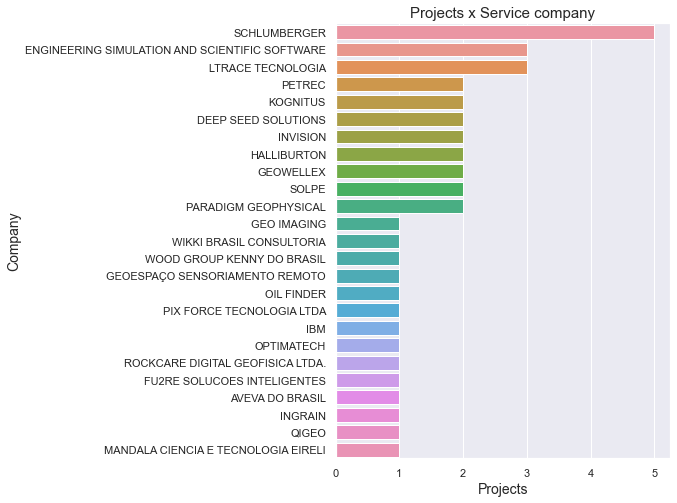

In [86]:
sns.set()
plt.figure(figsize = (6,8))

sns.barplot(x='Projects', y='Company', data=companies_exec, orient = 'h')

plt.title('Projects x Service company',fontsize=15)
plt.xlabel('Projects',fontsize=14)
plt.ylabel('Company',fontsize=14)
plt.show()

### Companies with more than 1 Project

In [87]:
companies_project=[]
companies_project=companies_exec[:11]
companies_project.loc[len(companies_project.index)] = ['OTHERS',sum(companies_exec['Projects'][11:]),0]

In [88]:
companies_project

,Company,Projects,Revenue (R$ Millions)
0,SCHLUMBERGER,5,39.87
1,ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE,3,17.54
2,LTRACE TECNOLOGIA,3,7.05
3,PETREC,2,9.29
4,KOGNITUS,2,4.24
5,DEEP SEED SOLUTIONS,2,6.82
6,INVISION,2,5.36
7,HALLIBURTON,2,39.47
8,GEOWELLEX,2,9.67
9,SOLPE,2,10.79


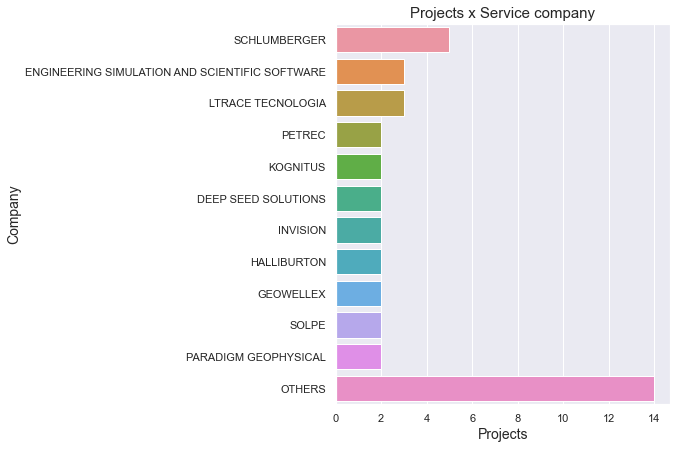

In [89]:
sns.set()
plt.figure(figsize = (6,7))

sns.barplot(x='Projects', y='Company', data=companies_project, orient = 'h')

plt.title('Projects x Service company',fontsize=15)
plt.xlabel('Projects',fontsize=14)
plt.ylabel('Company',fontsize=14)
plt.show()

### Service companies by Revenue

In [90]:
companies_exec.sort_values(by='Revenue (R$ Millions)',ascending=[False], inplace=True)
companies_exec.reset_index(drop=True, inplace=True)
companies_exec

,Company,Projects,Revenue (R$ Millions)
0,SCHLUMBERGER,5,39.87
1,HALLIBURTON,2,39.47
2,IBM,1,22.73
3,ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE,3,17.54
4,PARADIGM GEOPHYSICAL,2,14.52
5,AVEVA DO BRASIL,1,13.80
6,SOLPE,2,10.79
7,QIGEO,1,10.32
8,GEOWELLEX,2,9.67
9,PETREC,2,9.29


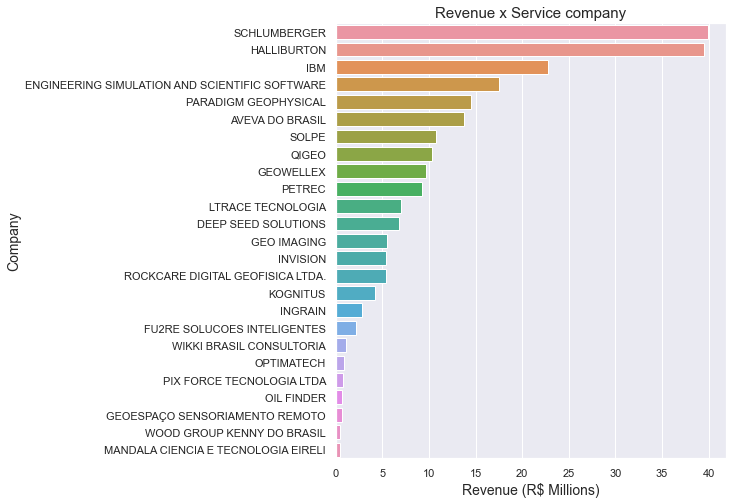

In [91]:
sns.set()
plt.figure(figsize = (7,8))

sns.barplot(x='Revenue (R$ Millions)', y='Company', data=companies_exec, orient = 'h')

plt.title('Revenue x Service company',fontsize=15)
plt.xlabel('Revenue (R$ Millions)',fontsize=14)
plt.ylabel('Company',fontsize=14)
plt.show()